<a href="https://colab.research.google.com/github/HasibAlMuzdadid/Data-Science-Projects/blob/main/medical%20data%20visualizer/medical_data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Medical data visualizer**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import Dataset
df = pd.read_csv("medical_examination.csv")

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.shape

(70000, 13)

In [ ]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [ ]:
# Summary of dataset
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Add an **overweight** column to the data. To determine if a person is overweight, first calculate their BMI by dividing their **weight in kilograms** by the square of their **height in meters**. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [ ]:
df["overweight"] = ((df["weight"]/((df["height"]/100)**2))>25).astype(int)

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


Normalize the data by making 0 always good and 1 always bad. If the value of **cholesterol** or **gluc** is 1, make the value 0. If the value is more than 1, make the value 1.

In [ ]:
df["cholesterol"] = (df["cholesterol"]>1).astype(int)
df["gluc"] = (df["gluc"]>1).astype(int)

df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0


*   Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's **catplot()**. The dataset should be split by 'Cardio' so there is one chart for each cardio value.

*   Clean the data. Filter out the following patient segments that represent incorrect data:
 *   diastolic pressure is higher than systolic (Keep the correct data with ( **df['ap_lo'] <= df['ap_hi'])** )
 
 *   height is less than the 2.5th percentile (Keep the correct data with ( **df['height'] >= df['height'].quantile(0.025)** ))

 *   height is more than the 97.5th percentile
 *   weight is less than the 2.5th percentile

 *   weight is more than the 97.5th percentile
*   Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's **heatmap()**. Mask the upper triangle.








In [ ]:
# Draw Categorical Plot

# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars=["cardio"], value_vars=["cholesterol","gluc","smoke","alco","active","overweight"])
print(df_cat)

        cardio     variable  value
0            0  cholesterol      0
1            1  cholesterol      1
2            1  cholesterol      1
3            1  cholesterol      0
4            0  cholesterol      0
...        ...          ...    ...
419995       0   overweight      1
419996       1   overweight      1
419997       1   overweight      1
419998       1   overweight      1
419999       0   overweight      0

[420000 rows x 3 columns]


In [ ]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
df_cat = df_cat.groupby(["cardio","variable","value"]).size().reset_index()
print(df_cat)

    cardio     variable  value      0
0        0       active      0   6378
1        0       active      1  28643
2        0         alco      0  33080
3        0         alco      1   1941
4        0  cholesterol      0  29330
5        0  cholesterol      1   5691
6        0         gluc      0  30894
7        0         gluc      1   4127
8        0   overweight      0  15915
9        0   overweight      1  19106
10       0        smoke      0  31781
11       0        smoke      1   3240
12       1       active      0   7361
13       1       active      1  27618
14       1         alco      0  33156
15       1         alco      1   1823
16       1  cholesterol      0  23055
17       1  cholesterol      1  11924
18       1         gluc      0  28585
19       1         gluc      1   6394
20       1   overweight      0  10539
21       1   overweight      1  24440
22       1        smoke      0  32050
23       1        smoke      1   2929


In [ ]:
df_cat = df_cat.rename(columns={0: 'total'})
print(df_cat)

    cardio     variable  value  total
0        0       active      0   6378
1        0       active      1  28643
2        0         alco      0  33080
3        0         alco      1   1941
4        0  cholesterol      0  29330
5        0  cholesterol      1   5691
6        0         gluc      0  30894
7        0         gluc      1   4127
8        0   overweight      0  15915
9        0   overweight      1  19106
10       0        smoke      0  31781
11       0        smoke      1   3240
12       1       active      0   7361
13       1       active      1  27618
14       1         alco      0  33156
15       1         alco      1   1823
16       1  cholesterol      0  23055
17       1  cholesterol      1  11924
18       1         gluc      0  28585
19       1         gluc      1   6394
20       1   overweight      0  10539
21       1   overweight      1  24440
22       1        smoke      0  32050
23       1        smoke      1   2929


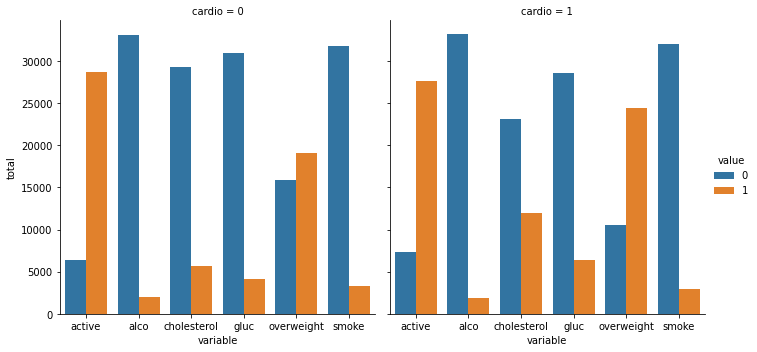

In [ ]:
# Draw the catplot with 'sns.catplot()'
fig = sns.catplot(data=df_cat, kind="bar", x="variable", y="total", hue="value", col="cardio")

 Draw Heat Map.


In [ ]:
# Clean the data
df_heat = df[ 
        ( df['ap_lo'] <= df['ap_hi'] ) & 
        ( df['height'] >= df['height'].quantile(0.025) ) & 
        ( df['height'] <= df['height'].quantile(0.975) ) & 
        ( df['weight'] >= df['weight'].quantile(0.025) ) & 
        ( df['weight'] <= df['weight'].quantile(0.975) ) 
        ]

print(df_heat)

          id    age  gender  height  ...  alco  active  cardio  overweight
0          0  18393       2     168  ...     0       1       0           0
1          1  20228       1     156  ...     0       1       1           1
2          2  18857       1     165  ...     0       0       1           0
3          3  17623       2     169  ...     0       1       1           1
4          4  17474       1     156  ...     0       0       0           0
...      ...    ...     ...     ...  ...   ...     ...     ...         ...
69993  99991  19699       1     172  ...     0       1       1           0
69994  99992  21074       1     165  ...     0       1       1           1
69995  99993  19240       2     168  ...     0       1       0           1
69998  99998  22431       1     163  ...     0       0       1           1
69999  99999  20540       1     170  ...     0       1       0           0

[63259 rows x 14 columns]


In [ ]:
# Calculate the correlation matrix
corr = df_heat.corr()
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(corr)

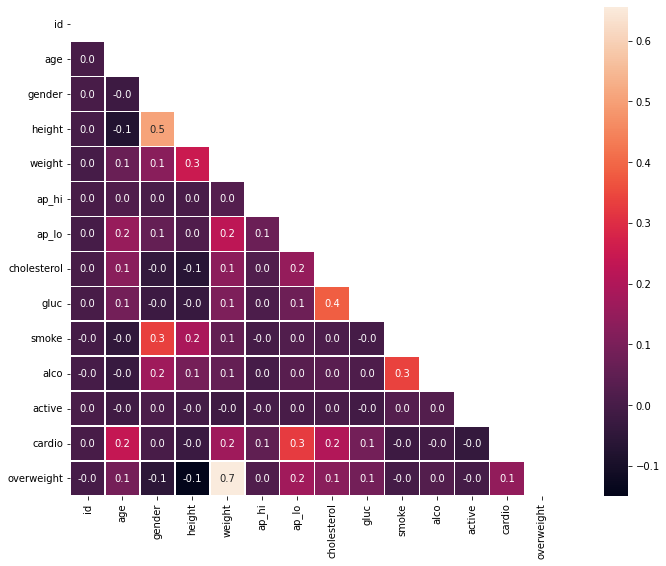

In [ ]:
# Set up the matplotlib figure
fig, ax =  plt.subplots(figsize=(16,9))

# Draw the heatmap with 'sns.heatmap()'
ax = sns.heatmap(corr, mask=mask,linewidths=0.5, annot=True, fmt='0.1f', square=True)